In [3]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import seaborn as sns


#https://altair-viz.github.io/gallery/errorbars_with_std.html
#import altair as alt
#from vega_datasets import data

#defining paths
results_Baseline_IssueTitle_RandomForest = './All_baseline.csv'
#classifierChain = './experiment/dfTesteClassifierChain_13Labels.csv'


dataBinary = pd.read_csv(results_Baseline_IssueTitle_RandomForest)
#dataClassifier = pd.read_csv(classifierChain)

In [4]:
dataBinary

,date_time,tf-IDF,#_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss,AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score,i,project
0,9/10/21 21:20,"(1, 1)",1140,Yes,0.2,RandomForest,0.714286,25,0.285714,0.342857,0.057143,0.871190,0.842857,0.936508,0.893939,0.914729,0,guava
1,9/10/21 21:20,"(1, 1)",1140,Yes,0.2,RandomForest,0.714286,25,0.285714,0.374026,0.057143,0.886905,0.850340,0.976562,0.868056,0.919118,1,guava
2,9/10/21 21:20,"(1, 1)",1140,Yes,0.2,RandomForest,0.800000,28,0.200000,0.314286,0.041558,0.908333,0.875000,0.941176,0.925620,0.933333,2,guava
3,9/10/21 21:20,"(1, 1)",1140,Yes,0.2,RandomForest,0.685714,24,0.314286,0.358442,0.067532,0.860000,0.825503,0.917910,0.891304,0.904412,3,guava
4,9/10/21 21:20,"(1, 1)",1140,Yes,0.2,RandomForest,0.771429,27,0.228571,0.407792,0.051948,0.889966,0.875000,0.979021,0.891720,0.933333,4,guava
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,9/10/21 16:32,"(4, 4)",598,Yes,0.4,MLkNN,0.600000,42,0.400000,0.883134,0.182143,0.758163,0.750611,0.756158,0.990323,0.857542,5,mockito
2276,9/10/21 16:32,"(4, 4)",598,Yes,0.4,MLkNN,0.685714,48,0.314286,0.924242,0.137500,0.817347,0.814010,0.817961,0.994100,0.897470,6,mockito
2277,9/10/21 16:32,"(4, 4)",598,Yes,0.4,MLkNN,0.542857,38,0.457143,0.840840,0.212500,0.717347,0.711864,0.713592,0.996610,0.831683,7,mockito
2278,9/10/21 16:32,"(4, 4)",598,Yes,0.4,MLkNN,0.542857,38,0.457143,0.880222,0.212500,0.717007,0.710462,0.712195,0.996587,0.830725,8,mockito


In [8]:
dataBinary = dataBinary[dataBinary.project != 'presto']

In [10]:
dataBinary

,date_time,tf-IDF,#_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss,AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score,i,project
0,9/10/21 21:20,"(1, 1)",1140,Yes,0.2,RandomForest,0.714286,25,0.285714,0.342857,0.057143,0.871190,0.842857,0.936508,0.893939,0.914729,0,guava
1,9/10/21 21:20,"(1, 1)",1140,Yes,0.2,RandomForest,0.714286,25,0.285714,0.374026,0.057143,0.886905,0.850340,0.976562,0.868056,0.919118,1,guava
2,9/10/21 21:20,"(1, 1)",1140,Yes,0.2,RandomForest,0.800000,28,0.200000,0.314286,0.041558,0.908333,0.875000,0.941176,0.925620,0.933333,2,guava
3,9/10/21 21:20,"(1, 1)",1140,Yes,0.2,RandomForest,0.685714,24,0.314286,0.358442,0.067532,0.860000,0.825503,0.917910,0.891304,0.904412,3,guava
4,9/10/21 21:20,"(1, 1)",1140,Yes,0.2,RandomForest,0.771429,27,0.228571,0.407792,0.051948,0.889966,0.875000,0.979021,0.891720,0.933333,4,guava
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,9/10/21 16:32,"(4, 4)",598,Yes,0.4,MLkNN,0.600000,42,0.400000,0.883134,0.182143,0.758163,0.750611,0.756158,0.990323,0.857542,5,mockito
2276,9/10/21 16:32,"(4, 4)",598,Yes,0.4,MLkNN,0.685714,48,0.314286,0.924242,0.137500,0.817347,0.814010,0.817961,0.994100,0.897470,6,mockito
2277,9/10/21 16:32,"(4, 4)",598,Yes,0.4,MLkNN,0.542857,38,0.457143,0.840840,0.212500,0.717347,0.711864,0.713592,0.996610,0.831683,7,mockito
2278,9/10/21 16:32,"(4, 4)",598,Yes,0.4,MLkNN,0.542857,38,0.457143,0.880222,0.212500,0.717007,0.710462,0.712195,0.996587,0.830725,8,mockito


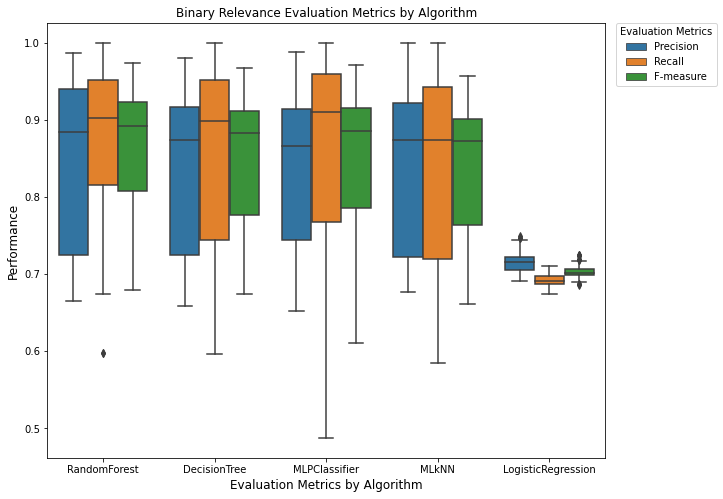

In [11]:
dd=pd.melt(dataBinary,id_vars=['Algorithm'],value_vars=['Precision','Recall','Fmeasure_Score'],var_name='Evaluation Metrics')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='Algorithm',data=dd,hue='Evaluation Metrics')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Algorithm",size=12)

labels=["Precision", "Recall", "F-measure"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Metrics",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Binary Relevance Evaluation Metrics by Algorithm", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")


In [17]:
dataBinary.groupby(['tf-IDF','Train/Test_Size']).mean()

#_TopTerms  Accuracy_Score  \
tf-IDF Train/Test_Size                                
(1, 1) 0.2              1178.111111        0.501760   
       0.3              1212.235294        0.486795   
       0.4              1212.235294        0.477178   
(2, 2) 0.2              1212.235294        0.480018   
       0.3              1212.235294        0.473500   
       0.4              1212.235294        0.461070   
(3, 3) 0.2              1212.235294        0.454705   
       0.3              1212.235294        0.443129   
       0.4              1212.235294        0.436633   
(4, 4) 0.2              1212.235294        0.431971   
       0.3              1212.235294        0.421942   
       0.4              1212.235294        0.412861   

                        Accuracy_Score_not_normalized  zero_one_loss  \
tf-IDF Train/Test_Size                                                 
(1, 1) 0.2                                  31.927778       0.498240   
       0.3                                  47.764706       0.513205   
       0.4                                  62.123529       0.522822   
(2, 2) 0.2                                  31.641176       0.519982   
       0.3                                  46.976471       0.526500   
       0.4                                  60.564706       0.538930   
(3, 3) 0.2                                  28.747059       0.545295   
       0.3                                  41.705882       0.556871   
       0.4                                  54.647059       0.563367   
(4, 4) 0.2                                  27.405882       0.568029   
       0.3                                  39.441176       0.578058   
       0.4                                  51.688235       0.587139   

                          AUC-PR  hamming_loss_avg  Jaccard_samples  \
tf-IDF Train/Test_Size                                                
(1, 1) 0.2              0.815246          0.104806         0.770373   
       0.3              0.794502          0.108503         0.763705   
       0.4              0.776328          0.110281         0.759389   
(2, 2) 0.2              0.817237          0.124479         0.755638   
       0.3              0.797573          0.128337         0.749870   
       0.4              0.781834          0.131908         0.744426   
(3, 3) 0.2              0.791790          0.140820         0.738114   
       0.3              0.775267          0.143423         0.733063   
       0.4              0.761576          0.144517         0.730886   
(4, 4) 0.2              0.799796          0.145113         0.731255   
       0.3              0.781466          0.147143         0.726146   
       0.4              0.768992          0.148271         0.724095   

                        Jaccard_macro  Precision    Recall  Fmeasure_Score  \
tf-IDF Train/Test_Size                                                       
(1, 1) 0.2                   0.767057   0.866552  0.856193        0.860033   
       0.3                   0.759220   0.861203  0.850677        0.854884   
       0.4                   0.754809   0.857870  0.848340        0.851916   
(2, 2) 0.2                   0.747980   0.837466  0.865580        0.847689   
       0.3                   0.742341   0.832642  0.863962        0.844291   
       0.4                   0.736839   0.830647  0.859368        0.840757   
(3, 3) 0.2                   0.717934   0.819277  0.850617        0.829507   
       0.3                   0.715597   0.812183  0.854136        0.828133   
       0.4                   0.713996   0.814777  0.849508        0.827088   
(4, 4) 0.2                   0.711391   0.813905  0.847153        0.825762   
       0.3                   0.708183   0.811908  0.844190        0.823433   
       0.4                   0.708419   0.811721  0.844590        0.823658   

                          i  
tf-IDF Train/Test_Size       
(1, 1) 0.2              4.5  
       0.3              4.5  
       0.4              4.5  
(2, 2) 

In [18]:
dataBinary.groupby(['Algorithm']).mean()

,#_TopTerms,Train/Test_Size,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss,AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score,i
Algorithm,,,,,,,,,,,,,
DecisionTree,1241.750000,0.300000,0.482730,45.225000,0.517270,0.690210,0.129363,0.755399,0.744226,0.834758,0.866648,0.846995,4.5
LogisticRegression,740.000000,0.300000,0.065590,24.950000,0.934410,0.771591,0.175832,0.553872,0.542423,0.714810,0.692262,0.703291,4.5
MLPClassifier,1241.750000,0.300000,0.495807,45.512500,0.504193,0.871523,0.127414,0.760028,0.744202,0.834846,0.865809,0.846090,4.5
MLkNN,1241.750000,0.300000,0.451221,42.710417,0.548779,0.889172,0.133559,0.745064,0.732600,0.839433,0.848618,0.839778,4.5
RandomForest,1228.612245,0.297959,0.495366,45.832653,0.504634,0.709389,0.124039,0.762829,0.754544,0.843828,0.870221,0.853360,4.5


In [19]:
dataBinary.groupby(['project']).mean()

,#_TopTerms,Train/Test_Size,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss,AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score,i
project,,,,,,,,,,,,,
guava,1140.0,0.300000,0.714057,37.014583,0.285943,0.633033,0.065397,0.866988,0.830882,0.912835,0.903280,0.906958,4.5
jabref,740.0,0.300000,0.065664,25.210000,0.934336,0.769946,0.176234,0.550865,0.539153,0.717801,0.685425,0.700460,4.5
mockito,598.0,0.297959,0.611486,31.624490,0.388514,0.845523,0.150087,0.777765,0.786953,0.807035,0.974629,0.879099,4.5
rxjava,2489.0,0.300000,0.531478,85.662500,0.468522,0.909366,0.122014,0.828144,0.818726,0.915214,0.887495,0.899879,4.5


In [13]:
dataBinary.nlargest(50,['Precision','Fmeasure_Score'])

,date_time,tf-IDF,#_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss,AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score,i,project
1876,9/10/21 16:15,"(1, 1)",598,Yes,0.3,MLkNN,0.750000,39,0.250000,0.991434,0.064904,0.851603,0.892430,1.000000,0.892430,0.943158,6,mockito
1830,9/10/21 16:14,"(1, 1)",598,Yes,0.2,MLkNN,0.685714,24,0.314286,0.986489,0.060714,0.832585,0.888158,1.000000,0.888158,0.940767,0,mockito
1870,9/10/21 16:15,"(1, 1)",598,Yes,0.3,MLkNN,0.692308,36,0.307692,0.982186,0.067308,0.835577,0.882353,1.000000,0.882353,0.937500,0,mockito
1916,9/10/21 16:16,"(1, 1)",598,Yes,0.4,MLkNN,0.728571,51,0.271429,0.984813,0.069643,0.832619,0.885294,0.996689,0.887906,0.939158,6,mockito
1119,9/11/21 8:30,"(1, 1)",2489,Yes,0.2,MLkNN,0.611111,66,0.388889,0.972236,0.105556,0.844907,0.838527,0.993289,0.843305,0.912173,9,rxjava
1159,9/11/21 8:32,"(1, 1)",2489,Yes,0.3,MLkNN,0.660494,107,0.339506,0.971288,0.092593,0.863683,0.853516,0.993182,0.858546,0.920969,9,rxjava
1111,9/11/21 8:30,"(1, 1)",2489,Yes,0.2,MLkNN,0.657407,71,0.342593,0.974992,0.081481,0.876235,0.865854,0.989547,0.873846,0.928105,1,rxjava
1435,9/11/21 8:45,"(3, 3)",2489,Yes,0.4,MLkNN,0.546296,118,0.453704,0.922289,0.146296,0.805710,0.772006,0.988909,0.778748,0.871336,5,rxjava
1439,9/11/21 8:46,"(3, 3)",2489,Yes,0.4,MLkNN,0.574074,124,0.425926,0.913375,0.147222,0.810185,0.766520,0.988636,0.773333,0.867830,9,rxjava
1359,9/11/21 8:42,"(3, 3)",2489,Yes,0.2,MLkNN,0.490741,53,0.509259,0.933712,0.183333,0.771605,0.720339,0.988372,0.726496,0.837438,9,rxjava


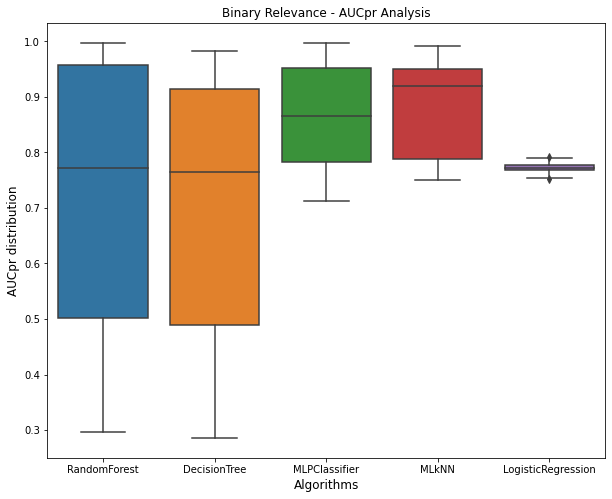

In [14]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='AUC-PR',x='Algorithm',data=dataBinary)
plt.ylabel("AUCpr distribution", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Binary Relevance - AUCpr Analysis", size=12)
plt.show()


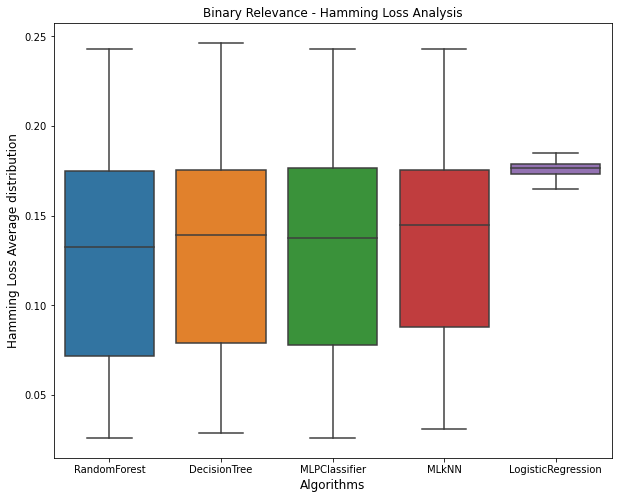

In [15]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='hamming_loss_avg',x='Algorithm',data=dataBinary)
plt.ylabel("Hamming Loss Average distribution", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Binary Relevance - Hamming Loss Analysis", size=12)
plt.show()

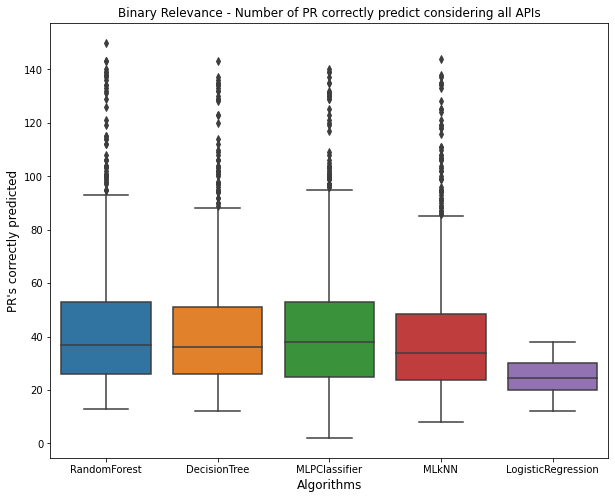

In [16]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='Accuracy_Score_not_normalized',x='Algorithm',data=dataBinary)
plt.ylabel("PR's correctly predicted", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Binary Relevance - Number of PR correctly predict considering all APIs", size=12)
plt.show()

In [9]:
def cliffsDelta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

In [10]:
#https://machinelearningmastery.com/effect-size-measures-in-python/
#Small Effect Size: d=0.20
#Medium Effect Size: d=0.50
#Large Effect Size: d=0.80

from numpy import mean
from numpy import var
from math import sqrt

def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s


In [11]:
#Subsetting data to compute Stats

RF_binary = dataBinary[dataBinary.Algorithm == 'RandomForest']
RF_FMeasure = RF_binary['Fmeasure_Score']

LogisticRegression_binary = dataBinary[dataBinary.Algorithm == 'LogisticRegression']
LogisticRegression_FMeasure = LogisticRegression_binary['Fmeasure_Score']

MLPC_binary = dataBinary[dataBinary.Algorithm == 'MLPClassifier']
MLPC_FMeasure = MLPC_binary['Fmeasure_Score']

DT_binary = dataBinary[dataBinary.Algorithm == 'DecisionTree']
DT_FMeasure = DT_binary['Fmeasure_Score']

MlkNN_binary = dataBinary[dataBinary.Algorithm == 'MLkNN']
MlkNN_FMeasure = MlkNN_binary['Fmeasure_Score']




In [12]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(RF_FMeasure, LogisticRegression_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

   
#Effect_Size RandomForest Vs others   
print(cliffsDelta(RF_FMeasure, LogisticRegression_FMeasure))
print(cliffsDelta(RF_FMeasure, MLPC_FMeasure))
print(cliffsDelta(RF_FMeasure, DT_FMeasure))
print(cliffsDelta(RF_FMeasure, MlkNN_FMeasure)) #divisionByZero error

#Effect_Size LogisticRegression Vs others
print(cliffsDelta(LogisticRegression_FMeasure, MLPC_FMeasure))
print(cliffsDelta(LogisticRegression_FMeasure, DT_FMeasure))
print(cliffsDelta(LogisticRegression_FMeasure, MlkNN_FMeasure))

#Effect_Size MLPC Vs others
print(cliffsDelta(MLPC_FMeasure, DT_FMeasure))
print(cliffsDelta(MLPC_FMeasure, MlkNN_FMeasure))

#Effect_Size MlkNN Vs others
print(cliffsDelta(MlkNN_FMeasure,DT_FMeasure))


Statistics=0.000, p=0.000
Different distribution (reject H0)


/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7039: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


ZeroDivisionError: division by zero

In [204]:
#Effect_Size RandomForest Vs others   
print('Cohens d: %.3f' % cohend(RF_FMeasure, LogisticRegression_FMeasure))    
print('Cohens d: %.3f' % cohend(RF_FMeasure, MLPC_FMeasure))
print('Cohens d: %.3f' % cohend(RF_FMeasure, DT_FMeasure))
print('Cohens d: %.3f' % cohend(RF_FMeasure, MlkNN_FMeasure))

#Effect_Size LogisticRegression Vs others
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, MLPC_FMeasure))    
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, DT_FMeasure))    
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, MlkNN_FMeasure))    

#Effect_Size MLPC Vs others
print('Cohens d: %.3f' % cohend(MLPC_FMeasure, DT_FMeasure))    
print('Cohens d: %.3f' % cohend(MLPC_FMeasure, MlkNN_FMeasure))    

#Effect_Size MlkNN Vs others
print('Cohens d: %.3f' % cohend(MlkNN_FMeasure,DT_FMeasure))    

Cohens d: -0.467
Cohens d: 0.857
Cohens d: 1.256
Cohens d: 0.585
Cohens d: 1.239
Cohens d: 1.583
Cohens d: 0.869
Cohens d: 0.467
Cohens d: -0.053
Cohens d: 0.437


In [205]:
### Wilcoxon paired and dependent samples

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

#from scipy.stats import wilcoxon

#stat, p = wilcoxon(data1, data2)
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
#alpha = 0.05
#if p > alpha:
#	print('Same distribution (fail to reject H0)')
#else:
#	print('Different distribution (reject H0)')

In [206]:
##Kruskall Wallis - Group Comparison

#Fail to Reject H0: Paired sample distributions are equal.
#Reject H0: Paired sample distributions are not equal.
    
from scipy.stats import kruskal
# seed the random number generator


# compare samples
stat, p = kruskal(RF_FMeasure,LogisticRegression_FMeasure, MLPC_FMeasure,DT_FMeasure,MlkNN_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=77.035, p=0.000
Different distributions (reject H0)


In [207]:
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(RF_FMeasure,LogisticRegression_FMeasure,MLPC_FMeasure,DT_FMeasure,MlkNN_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')


Statistics=76.940, p=0.000
Different distributions (reject H0)


In [208]:
###Precision analysis
#Subsetting data to compute Stats

RF_binary = dataBinary[dataBinary.Algorithm == 'RandomForest']
RF_Precision = RF_binary['Precision']

LogisticRegression_binary = dataBinary[dataBinary.Algorithm == 'LogisticRegression']
LogisticRegression_Precision = LogisticRegression_binary['Precision']

MLPC_binary = dataBinary[dataBinary.Algorithm == 'MLPClassifier']
MLPC_Precision = MLPC_binary['Precision']

DT_binary = dataBinary[dataBinary.Algorithm == 'DecisionTree']
DT_Precision = DT_binary['Precision']

MlkNN_binary = dataBinary[dataBinary.Algorithm == 'MLkNN']
MlkNN_Precision = MlkNN_binary['Precision']

In [209]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(RF_FMeasure, LogisticRegression_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

   
#Effect_Size RandomForest Vs others   
print(cliffsDelta(RF_Precision, LogisticRegression_Precision))
print(cliffsDelta(RF_Precision, MLPC_Precision))
print(cliffsDelta(RF_Precision, DT_Precision))
print(cliffsDelta(RF_Precision, MlkNN_Precision)) #divisionByZero error

#Effect_Size LogisticRegression Vs others
print(cliffsDelta(LogisticRegression_Precision, MLPC_Precision))
print(cliffsDelta(LogisticRegression_Precision, DT_Precision))
print(cliffsDelta(LogisticRegression_Precision, MlkNN_Precision))

#Effect_Size MLPC Vs others
print(cliffsDelta(MLPC_Precision, DT_Precision))
print(cliffsDelta(MLPC_Precision, MlkNN_Precision))

#Effect_Size MlkNN Vs others
print(cliffsDelta(MlkNN_Precision,DT_Precision))


Statistics=1200.000, p=0.001
Different distribution (reject H0)
(-0.6716666666666666, 'large')
(0.43, 'medium')
(0.48277777777777775, 'large')
(0.3566666666666667, 'medium')
(0.845, 'large')
(0.8425, 'large')
(0.8375, 'large')
(0.14583333333333334, 'negligible')
(-0.0075, 'negligible')
(0.10666666666666667, 'negligible')


In [210]:
##Kruskall Wallis - Group Comparison

#Fail to Reject H0: Paired sample distributions are equal.
#Reject H0: Paired sample distributions are not equal.
    
from scipy.stats import kruskal
# seed the random number generator


# compare samples
stat, p = kruskal(RF_Precision,LogisticRegression_Precision, MLPC_Precision,DT_Precision,MlkNN_Precision)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=111.411, p=0.000
Different distributions (reject H0)


In [211]:
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(RF_Precision,LogisticRegression_Precision, MLPC_Precision,DT_Precision,MlkNN_Precision)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=143.664, p=0.000
Different distributions (reject H0)


In [10]:
ConfusionMatrix = './experiment/CM(1, 1)895Yes0.2RandomForest0.csv'
#classifierChain = './experiment/dfTesteClassifierChain_13Labels.csv'


CM = pd.read_csv(ConfusionMatrix, sep=",")

In [11]:
#parsing Confusion matrix 

list(CM.columns) 
type(CM['0'])

columns = ['Label','TN', 'FP','FN','TP']
df = pd.DataFrame(columns=columns)

df['Label'], df['TN'], df['FP'], df['FN'], df['TP'] = CM['0'].str.split(',', 5).str
df = df.drop(0)


<ipython-input-11-ed6341641a1f>:9: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Label'], df['TN'], df['FP'], df['FN'], df['TP'] = CM['0'].str.split(',', 5).str


In [12]:
df

,Label,TN,FP,FN,TP
1,Google Common,105,13,28,33
2,Test,112,12,31,24
3,SO,153,8,10,8
4,IO,9,30,5,135
5,UI,30,26,11,112
6,Network,99,10,28,42
7,Security,168,6,4,1
8,OpenOffice Documents,164,6,3,6
9,Database,158,4,6,11
10,PDF,161,5,7,6
